In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [437]:
dengue_df = pd.read_csv('../assets/sg_dengue_w_weather_df.csv')
dengue_df.head()

,Year,eWeek,Cases,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Year_eWeek,Date,Month,Year_Month,Search Interest
0,2014,1,437.0,12.967797,8.641818,10.209091,11.001818,26.932018,31.615,25.110,8.771250,38.394737,2014-1,2013-12-29,12,2014-12,48
1,2014,2,479.0,57.510169,12.750909,15.549091,18.998182,26.333960,32.165,24.705,7.247024,40.494737,2014-2,2014-01-05,1,2014-1,60
2,2014,3,401.0,2.672881,2.320000,2.418182,2.432727,26.321053,30.255,25.000,12.207857,43.347368,2014-3,2014-01-12,1,2014-1,60
3,2014,4,336.0,0.000000,0.000000,0.000000,0.000000,25.869173,30.035,23.880,12.107857,41.184211,2014-4,2014-01-19,1,2014-1,42
4,2014,5,234.0,0.000000,0.000000,0.000000,0.000000,26.200902,32.530,24.240,12.105714,42.563158,2014-5,2014-01-26,1,2014-1,41


In [438]:
dengue_df.describe(include = 'all')

,Year,eWeek,Cases,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Year_eWeek,Date,Month,Year_Month,Search Interest
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260,260,260.000000,260,260.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260,260,NaN,60,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-1,2013-12-29,NaN,2016-7,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,5,NaN
mean,2016.000000,26.500000,186.911538,41.378566,14.685552,18.421710,20.816405,28.014561,33.096448,26.469543,8.382741,43.871044,NaN,NaN,6.507692,NaN,33.288462
std,1.416941,15.037277,159.122679,29.286363,7.346225,9.791011,11.605939,0.841203,0.763404,0.906535,1.629351,5.084755,NaN,NaN,3.442290,NaN,16.296880
min,2014.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,25.158348,30.035000,23.880000,5.504286,32.460000,NaN,NaN,1.000000,NaN,14.000000
25%,2015.000000,13.750000,61.750000,17.293773,9.132759,10.952140,11.774138,27.428264,32.618182,25.788696,7.103490,40.401732,NaN,NaN,4.000000,NaN,21.000000
50%,2016.000000,26.500000,155.000000,37.366102,15.379751,18.672830,20.467038,28.051781,33.129545,26.499773,8.166948,43.209773,NaN,NaN,7.000000,NaN,29.500000
75%,2017.000000,39.250000,250.000000,58.261526,19.912422,25.583445,29.015638,28.569456,33.556385,27.100000,9.298588,46.739286,NaN,NaN,9.250000,NaN,39.250000


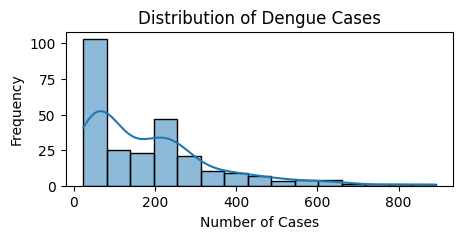

In [439]:
# histogram for dengue cases
plt.figure(figsize=(5,2))
sns.histplot(dengue_df['Cases'], kde=True)
plt.title('Distribution of Dengue Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.show()

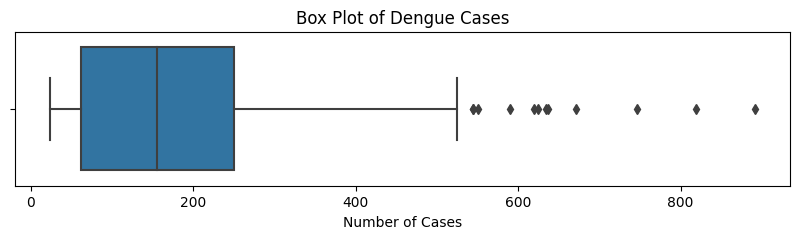

In [440]:
# box plot
plt.figure(figsize=(10,2))
sns.boxplot(x='Cases', data=dengue_df)
plt.title('Box Plot of Dengue Cases')
plt.xlabel('Number of Cases')
plt.show()

In [441]:
# dengue_df = dengue_df.rename(columns={"Daily Rainfall Total (mm)": "Avg Weekly Rainfall (mm)", 
#                                       "Mean Temperature (°C)": "Avg Weekly Temperature",
#                                       "Mean Wind Speed (km/h)": "Avg Weekly Wind Speed"})
dengue_df.columns

Index(['Year', 'eWeek', 'Cases', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'Year_eWeek', 'Date',
       'Month', 'Year_Month', 'Search Interest'],
      dtype='object')

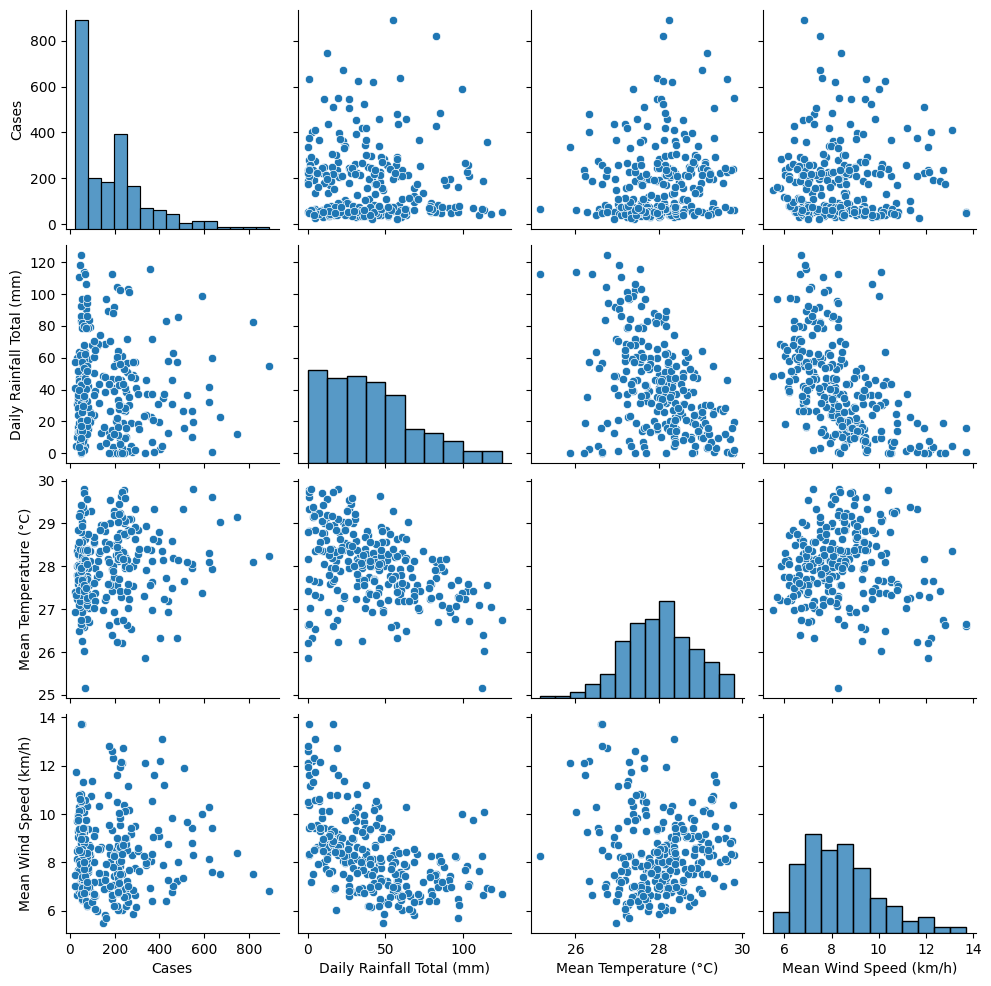

In [442]:
relevant_columns = ['Cases', 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']

sns.pairplot(dengue_df[relevant_columns])
plt.show()

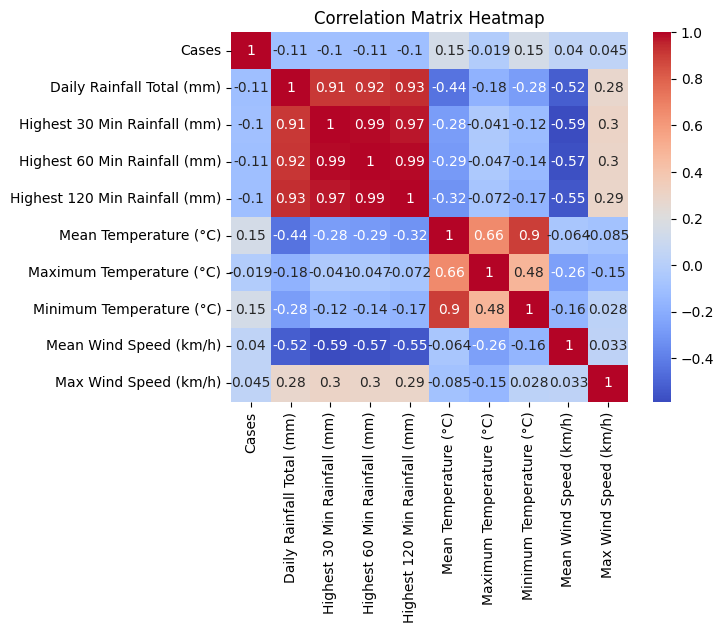

In [443]:
selected_cols = ['Cases', 'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)', 
                 'Mean Temperature (°C)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']

corr_matrix = dengue_df[selected_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Trends

In [444]:
# Convert 'Year_eWeek' to datetime by appending '-1' to make it a complete date (Monday of that week)
dengue_df['Date'] = pd.to_datetime(dengue_df['Year_eWeek'] + '-1', format='%Y-%W-%w')

# Set 'Date' as the index
dengue_df.set_index('Date', inplace=True)
dengue_df['Date'] = pd.to_datetime(dengue_df['Year_eWeek'] + '-1', format='%Y-%W-%w')
dengue_indexed = dengue_df
dengue_indexed.head()

,Year,eWeek,Cases,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Year_eWeek,Month,Year_Month,Search Interest,Date
Date,,,,,,,,,,,,,,,,,
2014-01-06,2014,1,437.0,12.967797,8.641818,10.209091,11.001818,26.932018,31.615,25.110,8.771250,38.394737,2014-1,12,2014-12,48,2014-01-06
2014-01-13,2014,2,479.0,57.510169,12.750909,15.549091,18.998182,26.333960,32.165,24.705,7.247024,40.494737,2014-2,1,2014-1,60,2014-01-13
2014-01-20,2014,3,401.0,2.672881,2.320000,2.418182,2.432727,26.321053,30.255,25.000,12.207857,43.347368,2014-3,1,2014-1,60,2014-01-20
2014-01-27,2014,4,336.0,0.000000,0.000000,0.000000,0.000000,25.869173,30.035,23.880,12.107857,41.184211,2014-4,1,2014-1,42,2014-01-27
2014-02-03,2014,5,234.0,0.000000,0.000000,0.000000,0.000000,26.200902,32.530,24.240,12.105714,42.563158,2014-5,1,2014-1,41,2014-02-03


#### Trend for Dengue cases

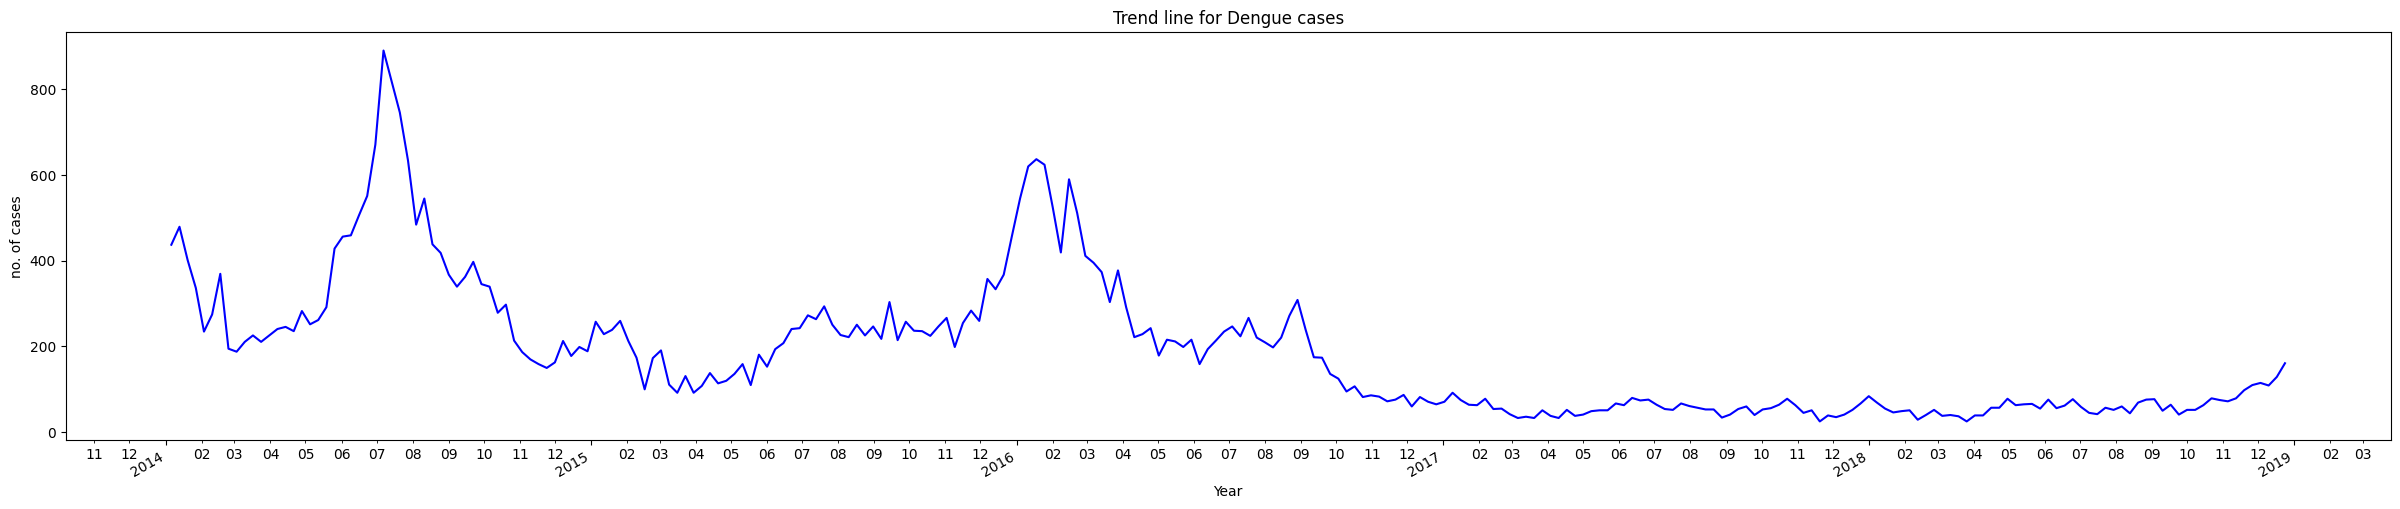

In [445]:
# Plot data.
plt.figure(figsize=(30,6))
plt.plot(dengue_df.index, dengue_df['Cases'], color = 'blue')

# Set major ticks to yearly frequency and minor ticks to monthly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Set major tick labels to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional: Set minor tick labels to month
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()
plt.title("Trend line for Dengue cases")
plt.xlabel("Year")
plt.ylabel("no. of cases")
plt.show()

### By Year

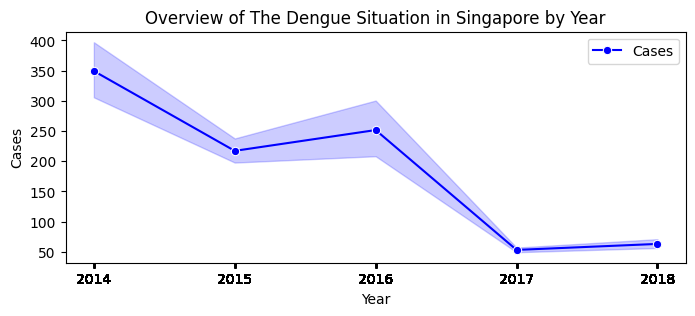

In [446]:
# Overview of the dengue situation in Singapore 
plt.figure(figsize = (8, 3))
sns.lineplot(x = "Year", y = "Cases", color='blue', label='Cases',marker='o', data =dengue_df )
plt.title('Overview of The Dengue Situation in Singapore by Year')
plt.xticks(dengue_df['Year'])
plt.show()

#### Trend for Rainfall

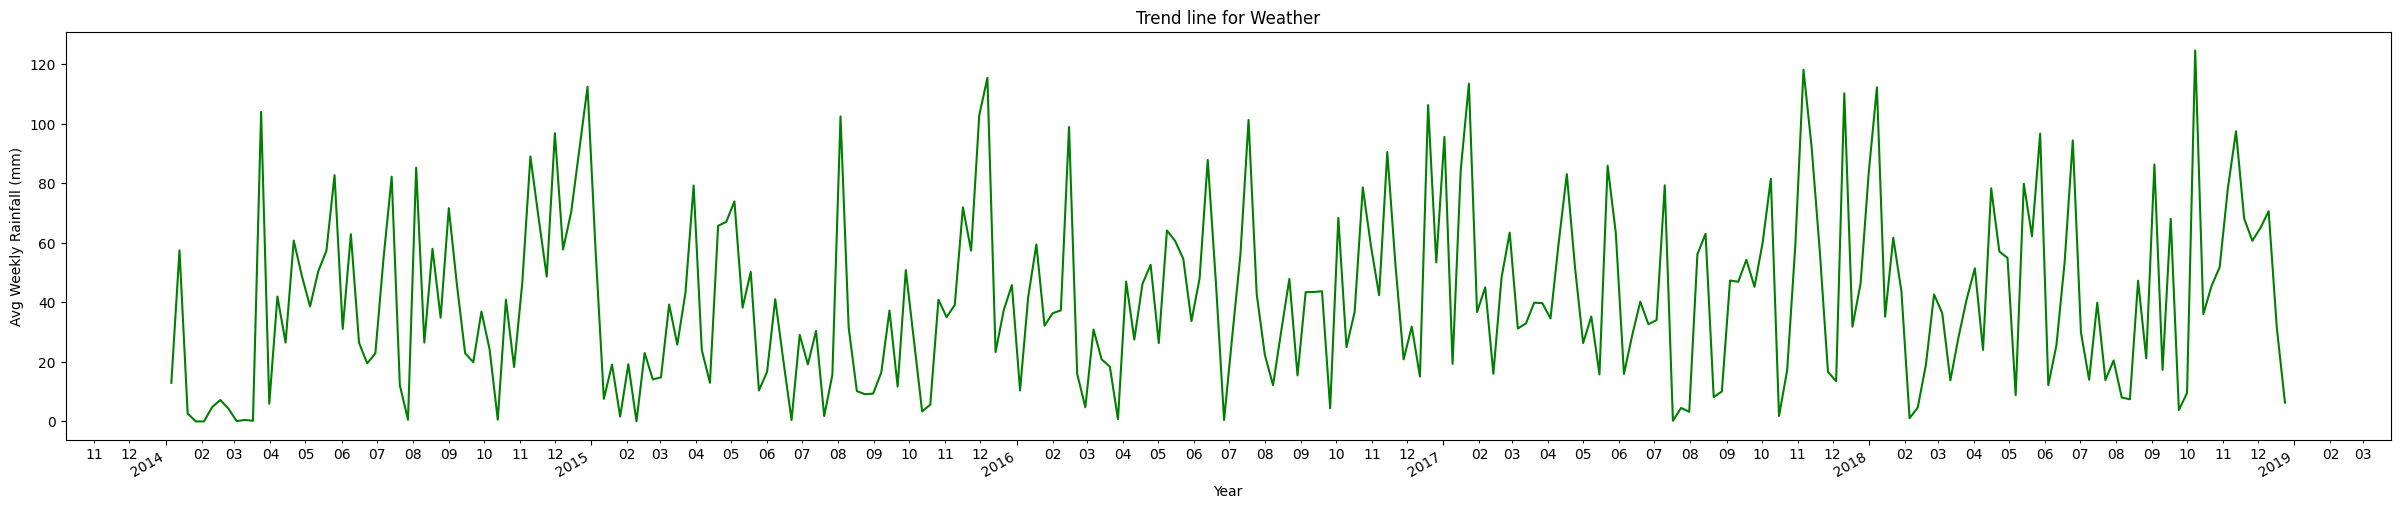

In [447]:
# Plot data.
plt.figure(figsize=(30,6))
plt.plot(dengue_df.index, dengue_df['Daily Rainfall Total (mm)'], color = 'green')

# Set major ticks to yearly frequency and minor ticks to monthly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Set major tick labels to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set minor tick labels to the month
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()
plt.title("Trend line for Weather")
plt.xlabel("Year")
plt.ylabel("Avg Weekly Rainfall (mm)")
plt.show()

#### Trend for Dengue and Rainfall

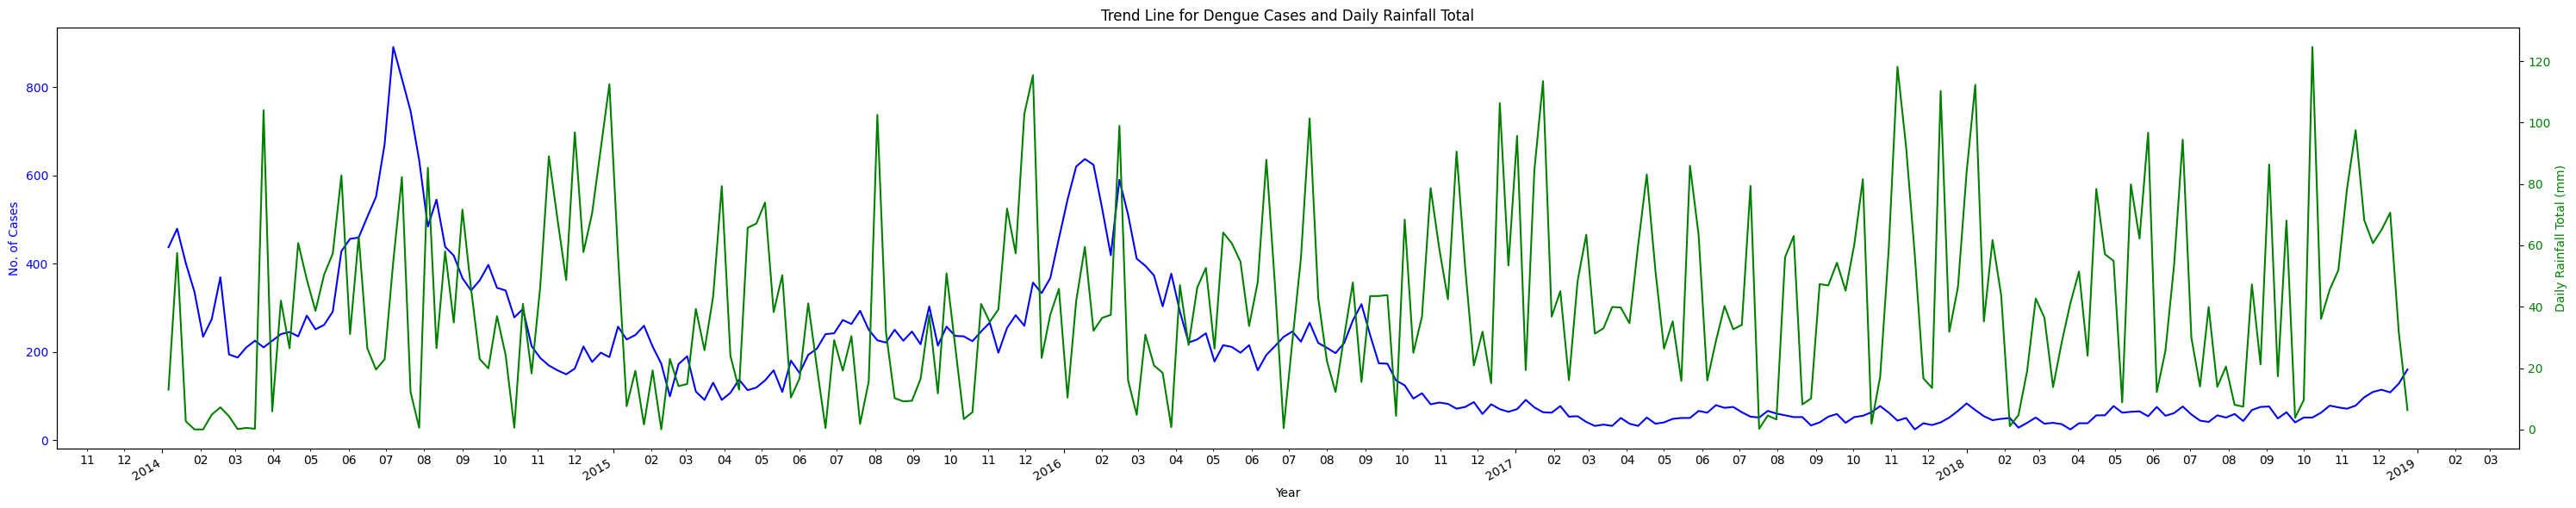

In [448]:
# Plotting
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plot dengue cases
ax1.plot(dengue_df.index, dengue_df['Cases'], color='blue', label='Dengue Cases')
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the rainfall
ax2 = ax1.twinx()
ax2.plot(dengue_df.index, dengue_df['Daily Rainfall Total (mm)'], color='green', label='Daily Rainfall Total (mm)')
ax2.set_ylabel('Daily Rainfall Total (mm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set major ticks to yearly frequency and minor ticks to monthly
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

# Set major tick labels to show only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional: Set minor tick labels to month
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.title("Trend Line for Dengue Cases and Daily Rainfall Total")
fig.tight_layout()  # Adjust layout to make room for the labels
plt.show()


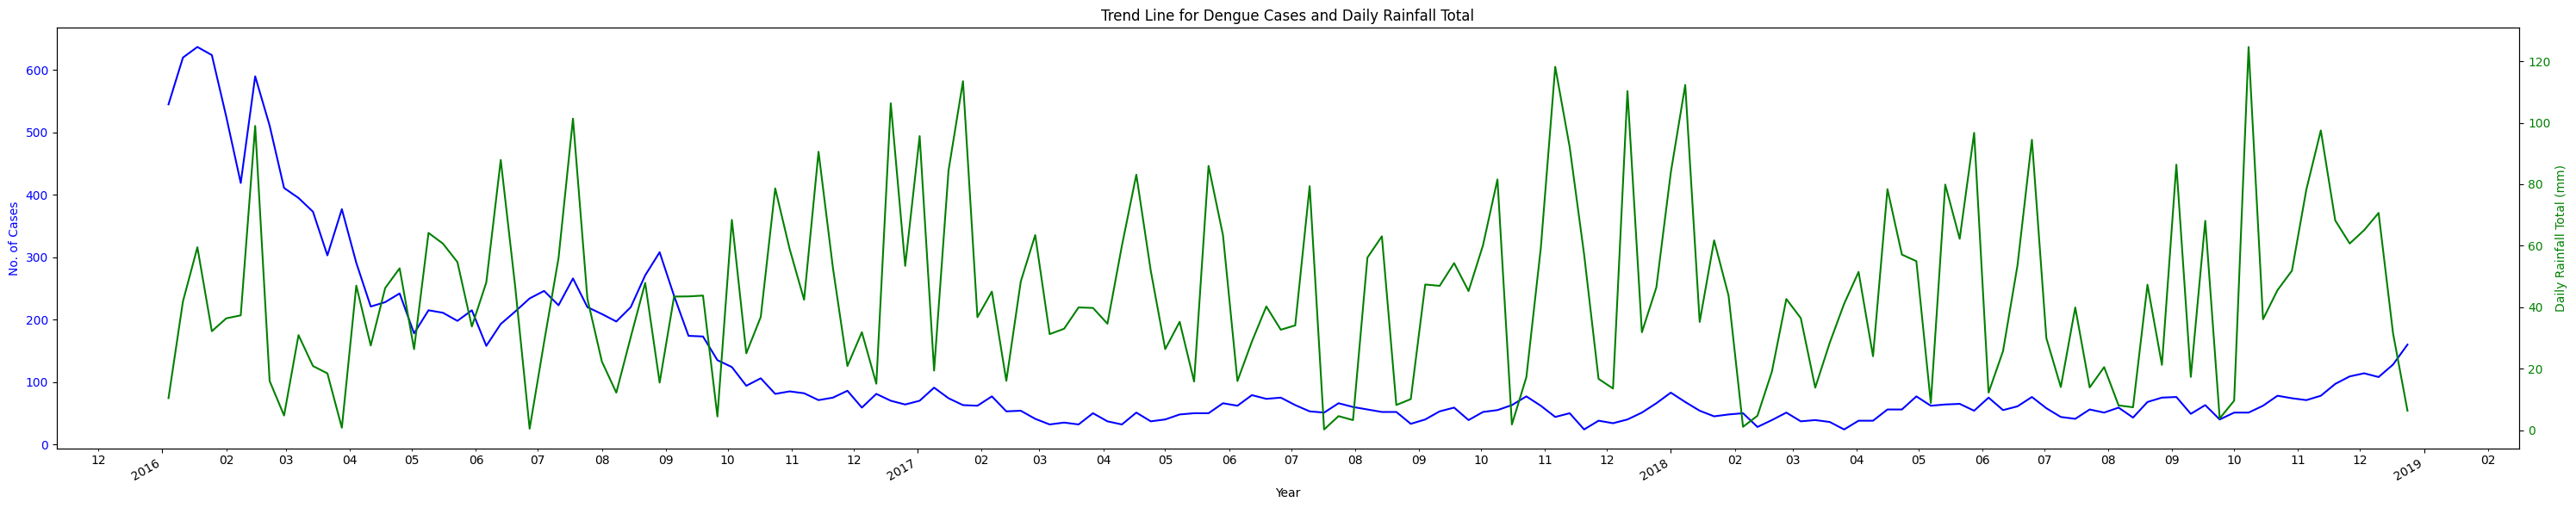

In [449]:
# Plotting
fig, ax1 = plt.subplots(figsize=(30, 6))

dengue_df_subset = dengue_df[dengue_df['Year'].isin([2016,2017,2018])]

# Plot dengue cases
ax1.plot(dengue_df_subset.index, dengue_df_subset['Cases'], color='blue', label='Dengue Cases')
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the rainfall
ax2 = ax1.twinx()
ax2.plot(dengue_df_subset.index, dengue_df_subset['Daily Rainfall Total (mm)'], color='green', label='Daily Rainfall Total (mm)')
ax2.set_ylabel('Daily Rainfall Total (mm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set major ticks to yearly frequency and minor ticks to monthly
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

# Set major tick labels to show only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional: Set minor tick labels to month
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.title("Trend Line for Dengue Cases and Daily Rainfall Total")
fig.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [450]:
#### Trend for Dengue and WindSpeed

### Decomposition

In [451]:
def decomposition(variable):
    df = dengue_indexed[variable]
    # Perform seasonal decomposition with a period of 52(Weekly Data)
    result = seasonal_decompose(df, model='additive', period=52)
    
    # Plot the results
    fig = result.plot()
    fig.set_size_inches(18.5, 10.5)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(26))
    plt.show()

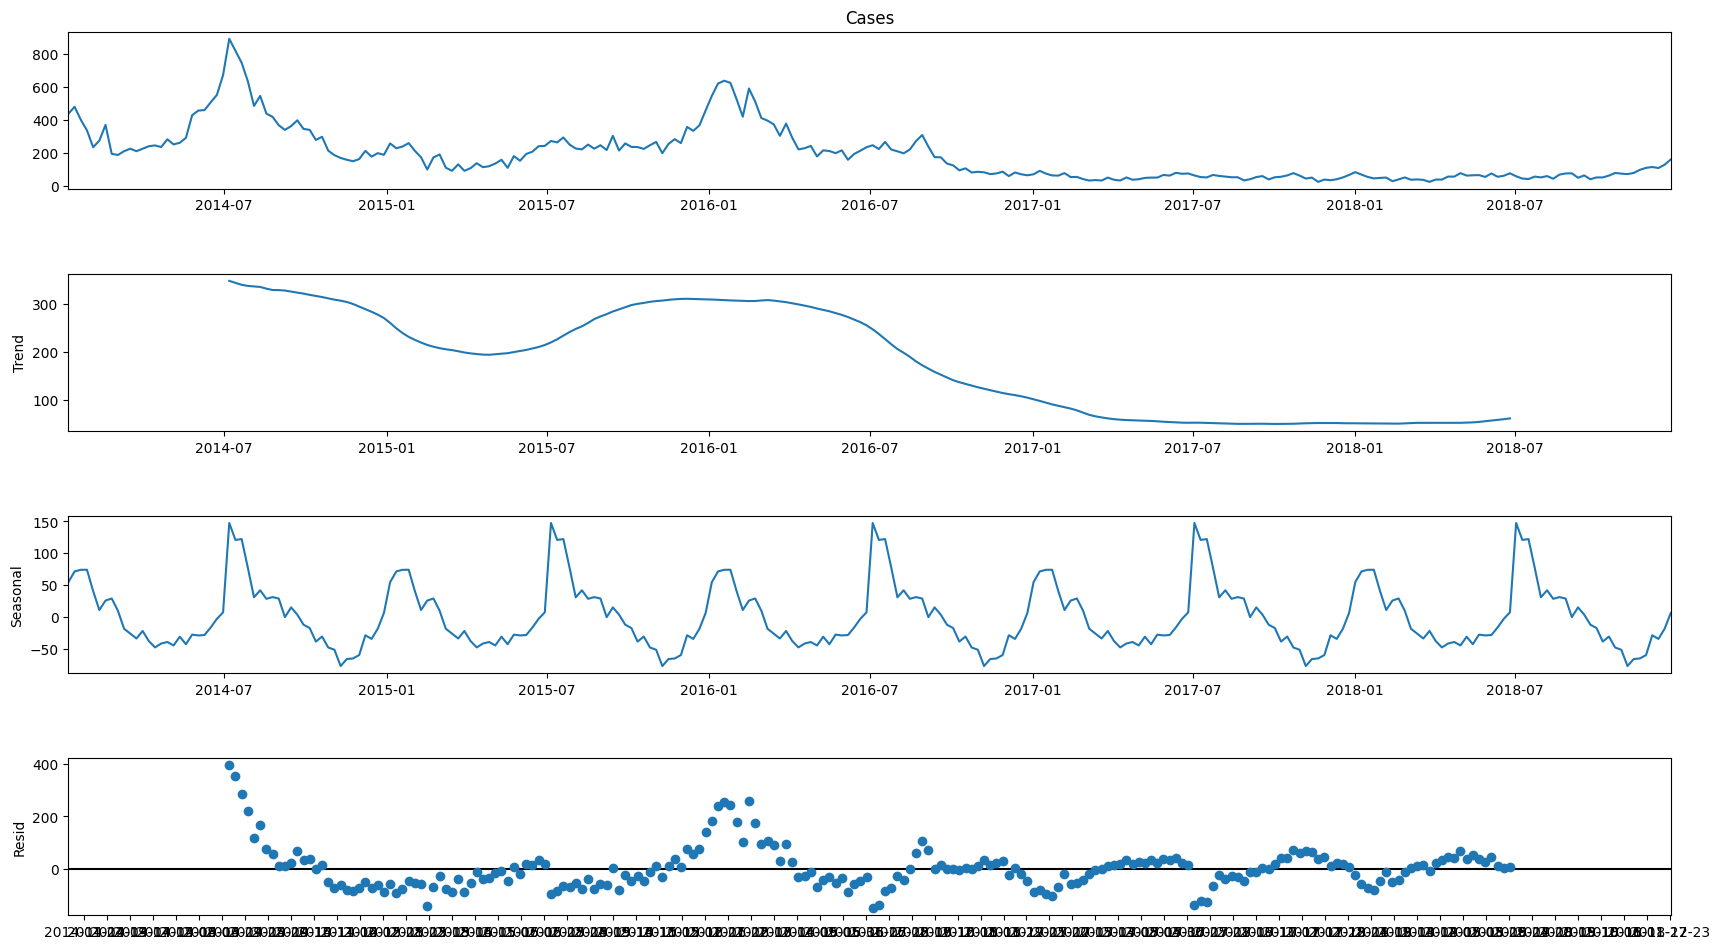

In [452]:
decomposition('Cases')

There is no observable trend in the data. We can clearly observe seasonality in the above graph, there is an increase in the dengue cases every 6 months.

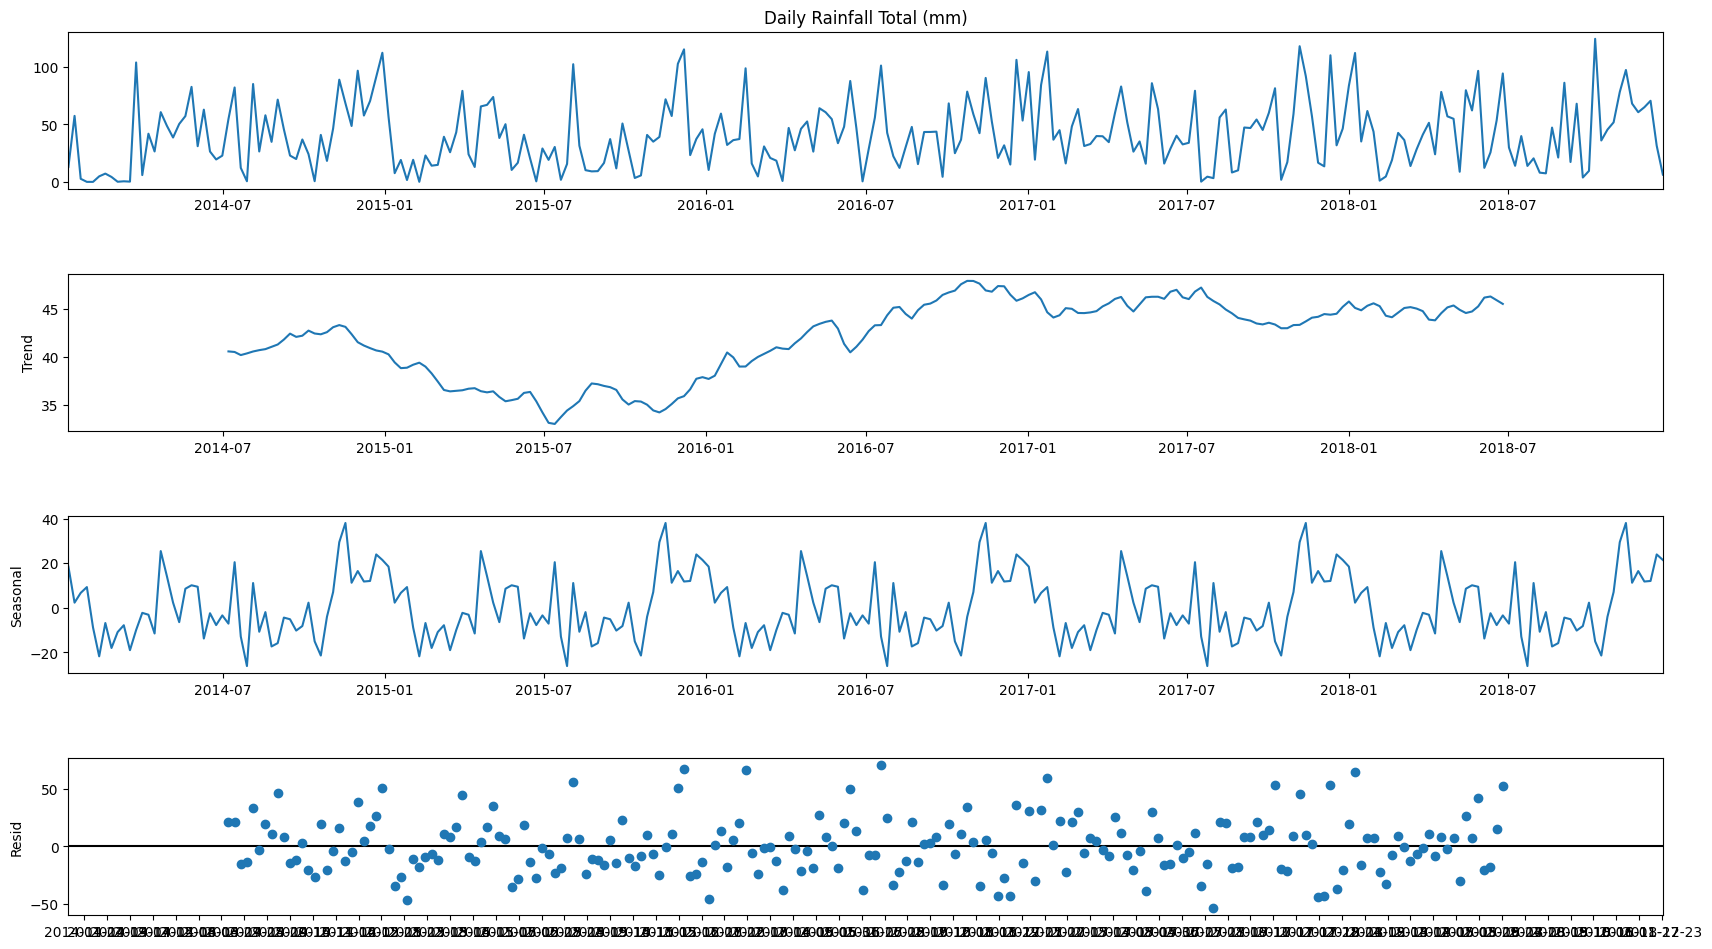

In [453]:
decomposition('Daily Rainfall Total (mm)')

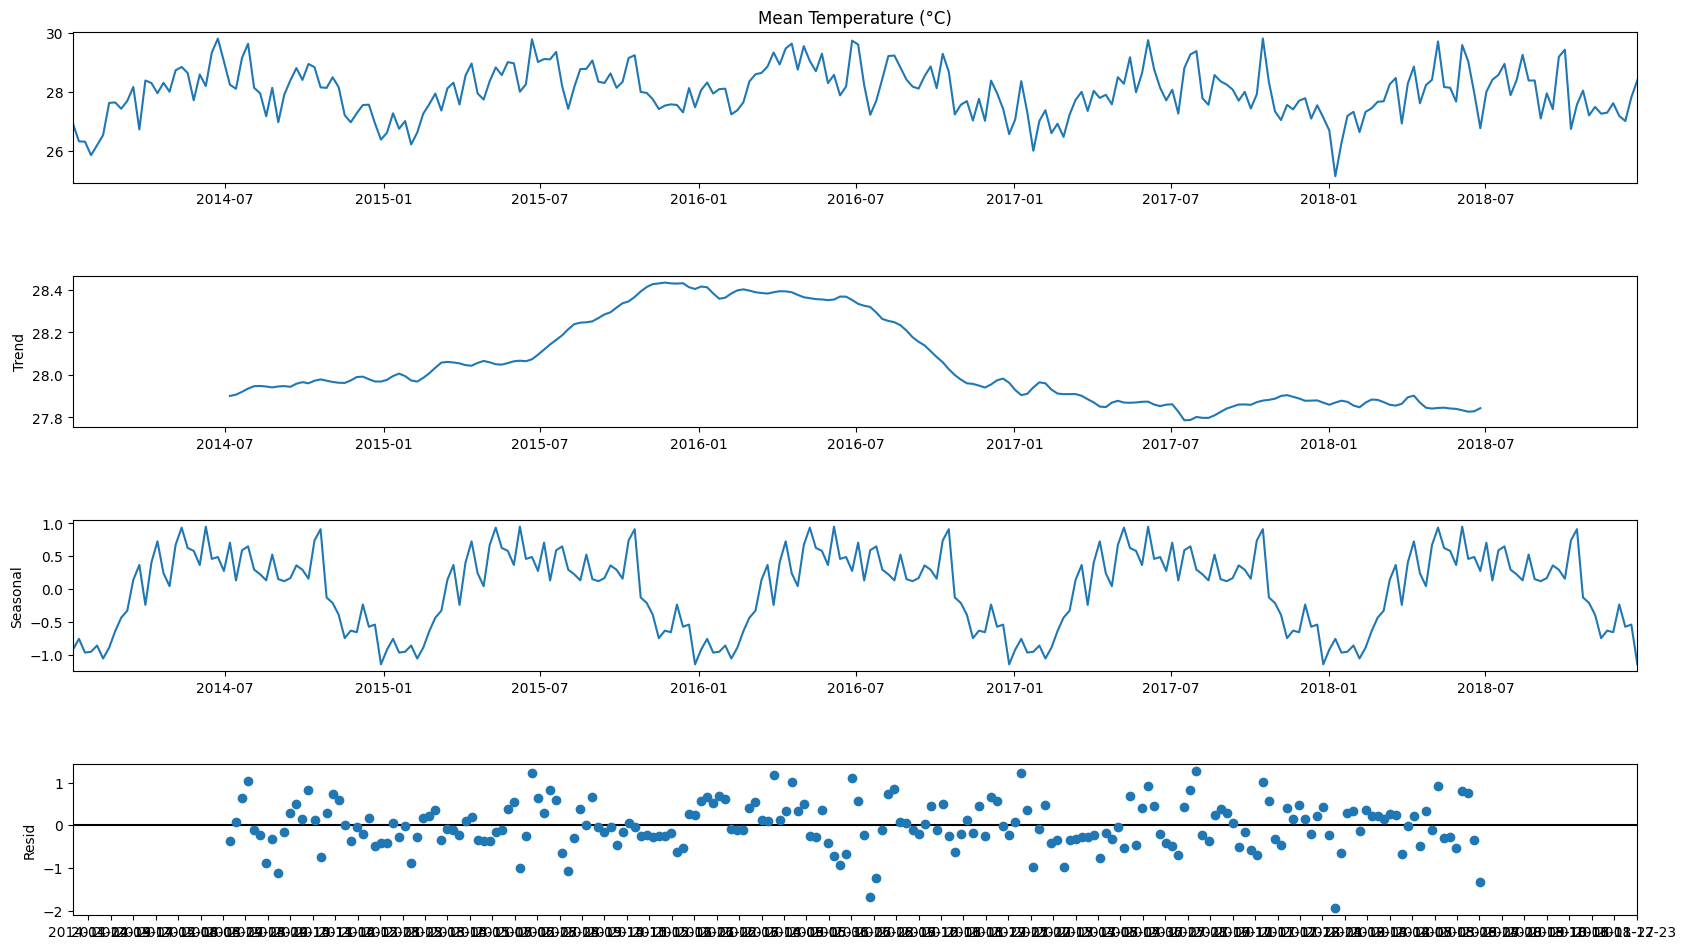

In [454]:
decomposition('Mean Temperature (°C)')

### Correlation

In [455]:
def columns_to_lag(columns_to_lag):

    dict = {}
    lags = [i for i in range(2,7)]
    
    # Initialize the correlation DataFrame
    corr_df = pd.DataFrame()
    corr_df['Cases'] = dengue_df['Cases']
    
    # Create lagged variables using a for loop
    for column in columns_to_lag:
        for lag in lags:
            corr_df[f'{column}_W-{lag}'] = dengue_df[column].shift(lag)

        # Calculate and sort the correlations with 'Cases'
        correlations = corr_df.corr()['Cases'].sort_values()
        cases_correlation_abs = correlations.abs()
        
        # Find the lag with the highest correlation with 'Cases'
        max_corr = cases_correlation_abs.drop('Cases').idxmax()
        max_corr_value = correlations[max_corr]

        dict[max_corr] = max_corr_value
        
    return dict

In [456]:
cols = ['Daily Rainfall Total (mm)','Mean Temperature (°C)','Mean Wind Speed (km/h)','Mean Temperature (°C)','Cases']
columns_to_lag(cols)

{'Daily Rainfall Total (mm)_W-2': -0.08345509832709014,
 'Mean Temperature (°C)_W-3': 0.18479394682864236,
 'Mean Wind Speed (km/h)_W-6': -0.2000720481716033,
 'Cases_W-2': 0.9251745012836389}

In [457]:
cols = ['Minimum Temperature (°C)','Maximum Temperature (°C)']
columns_to_lag(cols)

{'Minimum Temperature (°C)_W-3': 0.18498363962759903}

In [458]:
cols = ['Max Wind Speed (km/h)']
columns_to_lag(cols)

{'Max Wind Speed (km/h)_W-3': 0.06329731094106715}

In [459]:
cols = ['Search Interest']
columns_to_lag(cols)

{'Search Interest_W-2': 0.7854936201113483}

In [460]:
# Add 4 more coloumns into the df

dengue_df['Mean Wind Speed (km/h)_W-6'] = dengue_df['Mean Wind Speed (km/h)'].shift(6)
dengue_df['Weekly Rainfall Total (mm)_W-2'] = dengue_df['Daily Rainfall Total (mm)'].shift(2)
dengue_df['Mean Temperature (°C)_W-3'] = dengue_df['Mean Temperature (°C)'].shift(3)
dengue_df['Search Interest_W-2'] = dengue_df['Search Interest'].shift(2)
dengue_df.head(3)

,Year,eWeek,Cases,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),...,Max Wind Speed (km/h),Year_eWeek,Month,Year_Month,Search Interest,Date,Mean Wind Speed (km/h)_W-6,Weekly Rainfall Total (mm)_W-2,Mean Temperature (°C)_W-3,Search Interest_W-2
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-06,2014,1,437.0,12.967797,8.641818,10.209091,11.001818,26.932018,31.615,25.110,...,38.394737,2014-1,12,2014-12,48,2014-01-06,NaN,NaN,NaN,NaN
2014-01-13,2014,2,479.0,57.510169,12.750909,15.549091,18.998182,26.333960,32.165,24.705,...,40.494737,2014-2,1,2014-1,60,2014-01-13,NaN,NaN,NaN,NaN
2014-01-20,2014,3,401.0,2.672881,2.320000,2.418182,2.432727,26.321053,30.255,25.000,...,43.347368,2014-3,1,2014-1,60,2014-01-20,NaN,12.967797,NaN,48.0


In [461]:
#Save to csv file
dengue_df.to_csv('../assets/sg_dengue_w_weather_df.csv', index=False)

#### Which year have the highest and lowest dengue in the date range of analysis?

In [462]:
total_dengue_cases_by_year= dengue_df.groupby("Year").agg({"Cases": np.sum }).reset_index()


highest_dengue_year = total_dengue_cases_by_year.sort_values(by='Cases',ascending=False).iloc[0]
lowest_dengue_year = total_dengue_cases_by_year.sort_values(by='Cases',ascending=True).iloc[0]

print(f'The highest dengue year was {int(highest_dengue_year[0])} with {int(highest_dengue_year[1])} cases')
print(f'The lowest dengue year was {int(lowest_dengue_year[0])} with {int(lowest_dengue_year[1])} cases')
print(f'The difference between the years with the highest and lowest cases were {int(highest_dengue_year[1] - lowest_dengue_year[1])} cases.')

The highest dengue year was 2014 with 18168 cases
The lowest dengue year was 2017 with 2767 cases
The difference between the years with the highest and lowest cases were 15401 cases.


In [463]:
# Why 2017 is the lowest 

#### Which month had the highest dengue cases in 2014 and what was the weather like?

In [464]:
highest_dengue_year_2014 = dengue_df[dengue_df['Year'].isin([2014])]

highest_dengue_year_2014_month = highest_dengue_year_2014.sort_values(by='Cases',ascending=False).iloc[0]

highest_dengue_year_2014_month

Year                                             2014
eWeek                                              27
Cases                                           891.0
Daily Rainfall Total (mm)                   54.771429
Highest 30 Min Rainfall (mm)                19.149123
Highest 60 Min Rainfall (mm)                24.426316
Highest 120 Min Rainfall (mm)               30.110526
Mean Temperature (°C)                       28.240714
Maximum Temperature (°C)                    32.533333
Minimum Temperature (°C)                    27.033333
Mean Wind Speed (km/h)                       6.820408
Max Wind Speed (km/h)                       45.157143
Year_eWeek                                    2014-27
Month                                               6
Year_Month                                     2014-6
Search Interest                                    66
Date                              2014-07-07 00:00:00
Mean Wind Speed (km/h)_W-6                   6.408442
Weekly Rainfall Total (mm)_W

In [465]:
# July 2014 has the dengue cases in 2014

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

#### What is the statistics during Northeast Monsoon and Southwest Monsoon in the recent past 5 year?

In [466]:
max_year = max(dengue_df["Year"])
recent_5_years = list(range(max_year-4,max_year+1))
recent_5_years_df = dengue_df[dengue_df['Year'].isin(recent_5_years)]


northeast_monsoon_month = [12,1,2]
southwest_monsoon_month = [6,7,8,9]


recent_5_years_df_northeast_monsoon = recent_5_years_df[recent_5_years_df['Month'].isin(northeast_monsoon_month)]
recent_5_years_df_southwest_monsoon = recent_5_years_df[recent_5_years_df['Month'].isin(southwest_monsoon_month)]

unwanted_columns = ['Year_Month','Month','eWeek','Year']

recent_5_years_df_northeast_monsoon = recent_5_years_df_northeast_monsoon.drop(columns = unwanted_columns)
recent_5_years_df_southwest_monsoon = recent_5_years_df_southwest_monsoon.drop(columns = unwanted_columns)

print('Recent 5 Years Northeast Monsoon statistics')
print(round(recent_5_years_df_northeast_monsoon.mean(),2))

print('\n')

print('Recent 5 Years Southwest Monsoon statistics')
print(round(recent_5_years_df_southwest_monsoon.mean(),2))

Recent 5 Years Northeast Monsoon statistics
Cases                             214.83
Daily Rainfall Total (mm)          40.86
Highest 30 Min Rainfall (mm)       12.85
Highest 60 Min Rainfall (mm)       16.09
Highest 120 Min Rainfall (mm)      18.63
Mean Temperature (°C)              27.21
Maximum Temperature (°C)           32.65
Minimum Temperature (°C)           25.55
Mean Wind Speed (km/h)              9.71
Max Wind Speed (km/h)              43.34
Search Interest                    35.49
Mean Wind Speed (km/h)_W-6          7.79
Weekly Rainfall Total (mm)_W-2     47.41
Mean Temperature (°C)_W-3          27.20
Search Interest_W-2                34.38
dtype: float64


Recent 5 Years Southwest Monsoon statistics
Cases                             219.71
Daily Rainfall Total (mm)          34.07
Highest 30 Min Rainfall (mm)       13.52
Highest 60 Min Rainfall (mm)       16.77
Highest 120 Min Rainfall (mm)      18.78
Mean Temperature (°C)              28.46
Maximum Temperature (°C)          

C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_18368\2085554774.py:19: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(round(recent_5_years_df_northeast_monsoon.mean(),2))
C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_18368\2085554774.py:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(round(recent_5_years_df_northeast_monsoon.mean(),2))
C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_18368\2085554774.py:24: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(round(recent_5_years_df_southwest_monsoon.mean(),2))
C:\Users\Jia Hui\AppData\Local\Temp\ipykern

Based on the above statistics, the average cases during southwest monsoon is much more than the northest monsoon. This might due to the lower in avgerage total rainfall and lower avgerage rainfall per rainy day. While wet weather resulting in standing water increases mosquito breeding, heavy rain causes a “flushing effect” where the larvae are washed away, killing most of them (The Straits Times,2024).

### Total Dengue Cases vs Mean Wind Speed

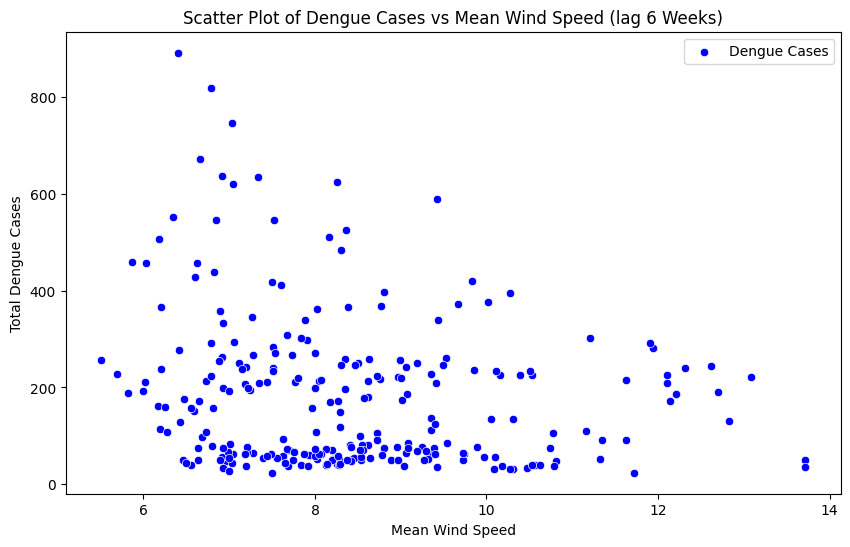

In [467]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean Wind Speed (km/h)_W-6', y= 'Cases', data=dengue_df, color='blue', label='Dengue Cases')
plt.title('Scatter Plot of Dengue Cases vs Mean Wind Speed (lag 6 Weeks)')
plt.xlabel('Mean Wind Speed')
plt.ylabel('Total Dengue Cases')
plt.legend()
plt.show()

### Total Dengue Cases vs Temperture

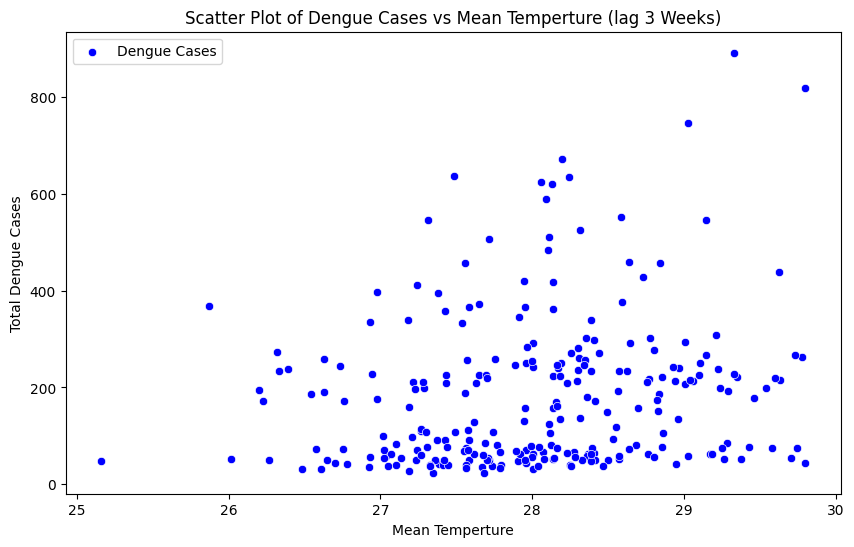

In [468]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean Temperature (°C)_W-3', y= 'Cases', data=dengue_df, color='blue', label='Dengue Cases')
plt.title('Scatter Plot of Dengue Cases vs Mean Temperture (lag 3 Weeks)')
plt.xlabel('Mean Temperture')
plt.ylabel('Total Dengue Cases')
plt.legend()
plt.show()

### Total Dengue Cases vs Rainfall

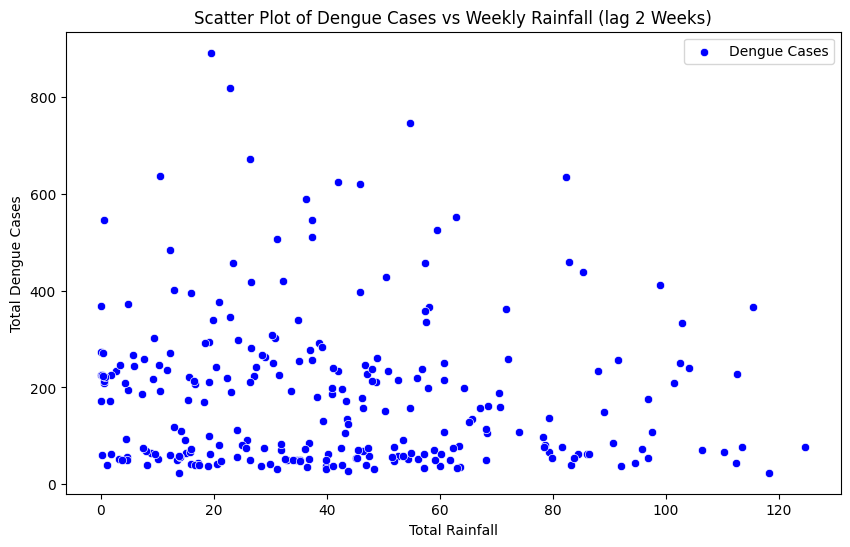

In [469]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weekly Rainfall Total (mm)_W-2', y= 'Cases', data=dengue_df, color='blue', label='Dengue Cases')
plt.title('Scatter Plot of Dengue Cases vs Weekly Rainfall (lag 2 Weeks)')
plt.xlabel('Total Rainfall')
plt.ylabel('Total Dengue Cases')
plt.legend()
plt.show()